In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
titanic_train = pd.read_csv('titanic_train.csv')

In [6]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
sns.set_style('whitegrid')

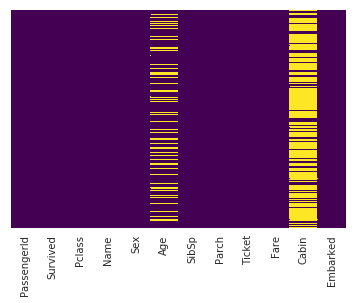

In [8]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

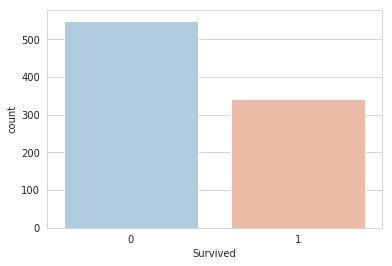

In [9]:
sns.countplot(x='Survived', data=titanic_train, palette='RdBu_r')

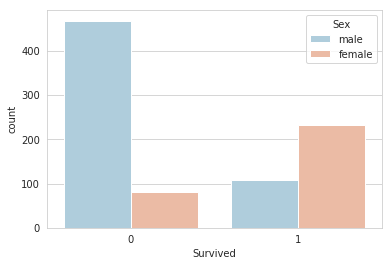

In [10]:
sns.countplot(x='Survived', hue='Sex', data=titanic_train, palette='RdBu_r')

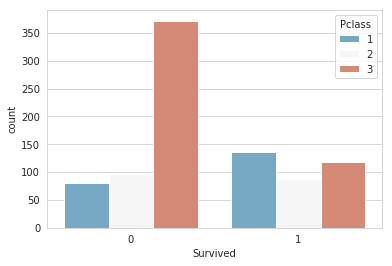

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=titanic_train, palette='RdBu_r')

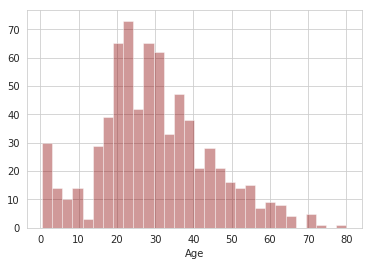

In [12]:
sns.distplot(titanic_train['Age'].dropna(), kde=False, color='darkred', bins=30)

In [13]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


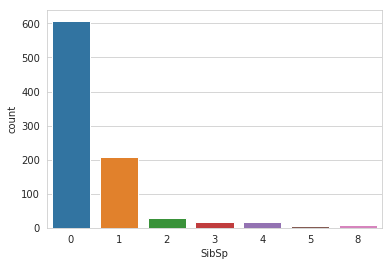

In [14]:
sns.countplot(x='SibSp', data=titanic_train)

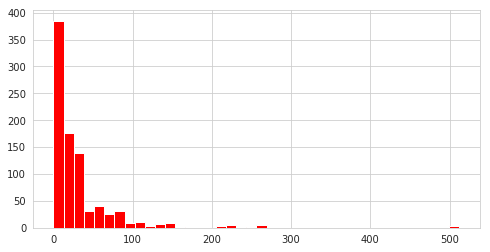

In [15]:
titanic_train['Fare'].hist(color='red', bins=40, figsize=(8,4))

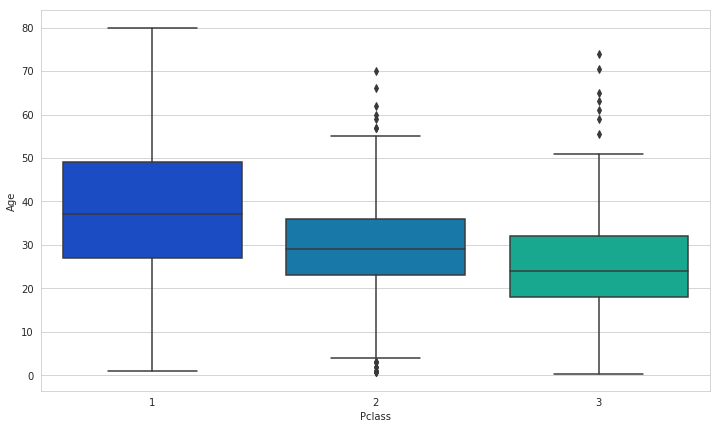

In [16]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=titanic_train, palette='winter')

In [20]:
def impute_age(cols):
    age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return age

In [21]:
titanic_train['Age'] = titanic_train[['Age', 'Pclass']].apply(impute_age, axis=1)

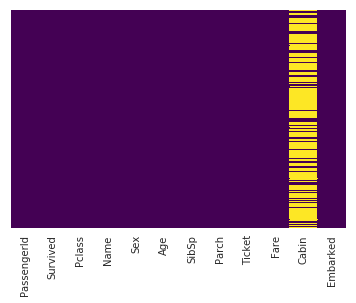

In [24]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [26]:
titanic_train.drop('Cabin', axis=1, inplace=True)

In [27]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [29]:
titanic_train.dropna(inplace=True)

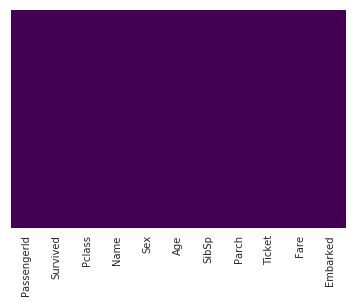

In [30]:
sns.heatmap(titanic_train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [31]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [33]:
sex = pd.get_dummies(titanic_train['Sex'], drop_first=True)
embark = pd.get_dummies(titanic_train['Embarked'], drop_first=True)

In [36]:
titanic_train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [37]:
titanic_train = pd.concat([titanic_train, sex, embark], axis=1)

In [38]:
titanic_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [39]:
from sklearn.model_selection import train_test_split

In [42]:
X = titanic_train.drop('Survived',axis=1)
y = titanic_train.Survived

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

/Users/lality/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
predictions = logmodel.predict(X_test)

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

